# Aviation Project

## Flatiron School

# BUSSINESS “PROBLEM”
I am charged with determining which aircraft are the lowest risk for my company to start this new business endeavor. I must then translate my findings into actionable insights that the Head of the new Aviation Division can use to help decide which aircraft to purchase.

In [531]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [532]:
# These codes load the CSV files into DataFrames to make them readable
df1 = pd.read_csv("AviationData.csv", encoding="latin1")
df2 = pd.read_csv("USState_Codes.csv", encoding="latin1")
print(df1)
print(df2)

             Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States      NaN       NaN      

/Users/victorcornejo/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [533]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [534]:
df2

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [535]:
df1['State'] = df1['Location'].str.strip().str[-2::]

In [536]:
df1['State'][0]

'ID'

In [537]:
merged_data = pd.merge(df1, df2, how = 'inner', left_on = "State", right_on = 'Abbreviation' )

In [538]:
merged_data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho,ID
1,20020917X02577,Accident,SEA82DA019,1982-01-15,"S.E. OF MALTA, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,VMC,Taxi,Probable Cause,15-01-1983,ID,Idaho,ID
2,20020917X02619,Accident,SEA82FA032,1982-01-21,"BOISE, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,21-01-1983,ID,Idaho,ID
3,20020917X02578,Accident,SEA82DA020,1982-01-22,"NEAR KINGSTON, ID",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,VMC,Maneuvering,Probable Cause,22-01-1983,ID,Idaho,ID
4,20020917X02630,Incident,SEA82IA029,1982-02-18,"BOISE, ID",United States,NaN,NaN,BOI,BOISE AIR TERMINAL,...,0.0,0.0,16.0,VMC,Takeoff,Probable Cause,18-02-1983,ID,Idaho,ID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82663,20040728X01082,Accident,ATL04LA153,2004-07-12,"BEEF ISLAND, VI",United States,18.08,-65.08,NaN,NaN,...,1.0,NaN,NaN,VMC,Cruise,Probable Cause,13-09-2005,VI,Virgin Islands,VI
82664,20040930X01542,Accident,MIA04LA131,2004-09-04,"ST. THOMAS, VI",United States,18.333333,-64.983333,NaN,NaN,...,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,28-04-2005,VI,Virgin Islands,VI
82665,20060504X00505,Accident,MIA06TA093,2006-04-18,"St. Thomas, VI",United States,18.301944,-64.987222,TIST,Cyril E. King,...,NaN,7.0,NaN,VMC,Descent,Probable Cause,31-03-2008,VI,Virgin Islands,VI
82666,20060724X00998,Accident,MIA06LA125,2006-07-19,"ST. THOMAS, VI",United States,18.333333,-64.966667,TIST,Cyril E King Airport,...,NaN,1.0,3.0,VMC,Takeoff,Probable Cause,30-04-2008,VI,Virgin Islands,VI


In [539]:
merged_data = pd.merge(df1, df2, how='inner', left_on='State', right_on='Abbreviation')

In [540]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


In [541]:
columns = list(merged_data.columns)
state_index = columns.index('State')
location_index = columns.index('Location')

# Move 'State' column after 'Location' column
columns.pop(state_index)
columns.insert(location_index + 1, 'State')

# Update DataFrame with new column order
merged_data = merged_data[columns]

# Display the resulting DataFrame
print(merged_data.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20020917X02577           Accident      SEA82DA019  1982-01-15   
2  20020917X02619           Accident      SEA82FA032  1982-01-21   
3  20020917X02578           Accident      SEA82DA020  1982-01-22   
4  20020917X02630           Incident      SEA82IA029  1982-02-18   

            Location State        Country Latitude Longitude Airport.Code  \
0    MOOSE CREEK, ID    ID  United States      NaN       NaN          NaN   
1  S.E. OF MALTA, ID    ID  United States      NaN       NaN          NaN   
2          BOISE, ID    ID  United States      NaN       NaN          NaN   
3  NEAR KINGSTON, ID    ID  United States      NaN       NaN          NaN   
4          BOISE, ID    ID  United States      NaN       NaN          BOI   

   ... Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
0  ...                  2.0                    0.0   

In [542]:
columns = list(merged_data.columns)
state_index = columns.index('State')
location_index = columns.index('Location')

# Move 'State' column after 'Location' column
columns.pop(state_index)
columns.insert(location_index + 1, 'State')

# Update DataFrame with new column order
merged_data = merged_data[columns]

# Check the first few rows of the resulting DataFrame
print(merged_data.head())

# Check unique values in the 'State' column
print("Unique values in the 'State' column:", merged_data['State'].unique())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20020917X02577           Accident      SEA82DA019  1982-01-15   
2  20020917X02619           Accident      SEA82FA032  1982-01-21   
3  20020917X02578           Accident      SEA82DA020  1982-01-22   
4  20020917X02630           Incident      SEA82IA029  1982-02-18   

            Location State        Country Latitude Longitude Airport.Code  \
0    MOOSE CREEK, ID    ID  United States      NaN       NaN          NaN   
1  S.E. OF MALTA, ID    ID  United States      NaN       NaN          NaN   
2          BOISE, ID    ID  United States      NaN       NaN          NaN   
3  NEAR KINGSTON, ID    ID  United States      NaN       NaN          NaN   
4          BOISE, ID    ID  United States      NaN       NaN          BOI   

   ... Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.Injuries  \
0  ...                  2.0                    0.0   

In [543]:
# Convert 'Event.Date' to datetime format
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'], errors='coerce')

# Check the updated DataFrame
print(df1[['Event.Date']].head())

  Event.Date
0 1948-10-24
1 1962-07-19
2 1974-08-30
3 1977-06-19
4 1979-08-02


In [544]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


- What I did above was to join my two csv documents and together create a single data frame with 32 columns.

- I have also converted the event date to date time format



# DATA ANALYSIS

In [545]:
# 'df1' is my DataFrame
columns_list = df1.columns.tolist()

# Display the list of columns
print(columns_list)

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'State']


In [546]:
for i, column in enumerate(df1.columns):
    print(f"Column {i + 1}: {column}")

Column 1: Event.Id
Column 2: Investigation.Type
Column 3: Accident.Number
Column 4: Event.Date
Column 5: Location
Column 6: Country
Column 7: Latitude
Column 8: Longitude
Column 9: Airport.Code
Column 10: Airport.Name
Column 11: Injury.Severity
Column 12: Aircraft.damage
Column 13: Aircraft.Category
Column 14: Registration.Number
Column 15: Make
Column 16: Model
Column 17: Amateur.Built
Column 18: Number.of.Engines
Column 19: Engine.Type
Column 20: FAR.Description
Column 21: Schedule
Column 22: Purpose.of.flight
Column 23: Air.carrier
Column 24: Total.Fatal.Injuries
Column 25: Total.Serious.Injuries
Column 26: Total.Minor.Injuries
Column 27: Total.Uninjured
Column 28: Weather.Condition
Column 29: Broad.phase.of.flight
Column 30: Report.Status
Column 31: Publication.Date
Column 32: State


# COLUMNS THAT I WILL ANALYZE BELOW:


- Accident.Number

- Event.Date

- Injury.Severity

- Aircraft.damage

- Aircraft.Category

- Make

- Model

- Number.of.Engines

- Engine.Type

- Air.carrier

- Weather.Condition

- Total.Fatal.Injuries

- Total.Serious.Injuries

- Total.Minor.Injuries

- Total.Uninjured

- Broad.phase.of.flight

In [547]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


- Data types


In [548]:
column_data_types = df1.dtypes

# Display the data types of each column
print(column_data_types)

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

# AIRCRAFTS OVERALL ARE SAFER AFTER 1996


- Crash rates for models launched in the late 1990s to present are notably lower than versions originating in earlier decades.

- Source: https://www.forbes.com/sites/geoffwhitmore/2019/08/16/what-is-the-safest-airplane-to-fly/?sh=691d0d825c72

- Since 1997, the number of fatal air accidents has been no more than 1 for every 2,000,000,000 person-miles flown...

- Source: https://en.wikipedia.org/wiki/Aviation_safety#:~:text=Since%201997%2C%20the%20number%20of,passengers%2C%20such%20as%20one%20person

- Since 1996, the United States has improved existing aircraft and introduced so-called fifth-generation aircraft, including the F-22 and F-35. 

- The results suggest that U.S. requirements have increased by several hundred percent since 1996.

- Source : https://www.rand.org/paf/projects/us-china-scorecard.html#:~:text=Since%201996%2C%20the%20United%20States,%2D22%20and%20F%2D35.


## For reasons of time and work, less redundancy of unnecessary information, and considering that airplanes made after 01/01/1997 are safer, I am going to discard events prior to January 1, 1997.

In [550]:
df_filtered = df1[df1['Event.Date'] > '1997-01-01']

# Display the filtered DataFrame
print(df_filtered)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41097  20001208X07354           Accident      SEA97FA041 1997-01-02   
41098  20001208X07328           Accident      MIA97LA056 1997-01-02   
41099  20001208X07322           Accident      MIA97FA057 1997-01-02   
41100  20001208X07302           Accident      IAD97FA039 1997-01-02   
41101  20001208X07250           Accident      ANC97LA017 1997-01-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

             Location        Country Latitude Longitude Airport.Code  \
41097   CAMBRIDGE, ID  United States      NaN       NaN          NaN   
410

- Now we have 47792 rows.
- We can now focus our time on new generation aircraft that are considered safer!
- That does not mean that some airplanes made before 01/01/1997 are not safety. I will explain with information this later.

##  I removed data that is older than 01/01/1997.

- Now my data will be updated.


# CEO is looking for safetiness

- For concepts of this Analysis:

## Safety Aircraft.
- Will be a plane with Non-Fatal values.

## Unsafety Aircraft.
- Will be a plane with data showing that a person had a minor or major/serious injury, or either a fatality, or an incident, classifying all of these as Unsafety Aircraft... !

- Now I will analyze to get the count of : Total.Fatal.Injuries grouped by 'Make' and sorted by descending order based on the 'Event.Date' for events occurring on or after '1997-01-01'

- Taking the Total.Fatal.Injuries variable because I want to save lives, so not focusing for now on variables of minor injuries, those are also unsafety planes, but I need to work with less data now.

In [551]:
# df1 = df1.copy()  # Create a copy to avoid SettingWithCopyWarning
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'], errors='coerce')  # Convert 'Event.Date' to datetime format

filtered_df = df1[df1['Event.Date'] >= '1997-01-01']  # Filter events after '1997-01-01'

fatalities_by_make = filtered_df.groupby('Make')['Total.Fatal.Injuries'].count().sort_values(ascending=False)

# Display the result
print(fatalities_by_make)

Make
CESSNA               4922
Cessna               4462
PIPER                2841
Piper                2536
BOEING               1151
                     ... 
Grafton                 0
Mcfaul, Daniel D.       0
Mcintosh                0
Gothard                 0
Brook                   0
Name: Total.Fatal.Injuries, Length: 6292, dtype: int64


## Seaborn

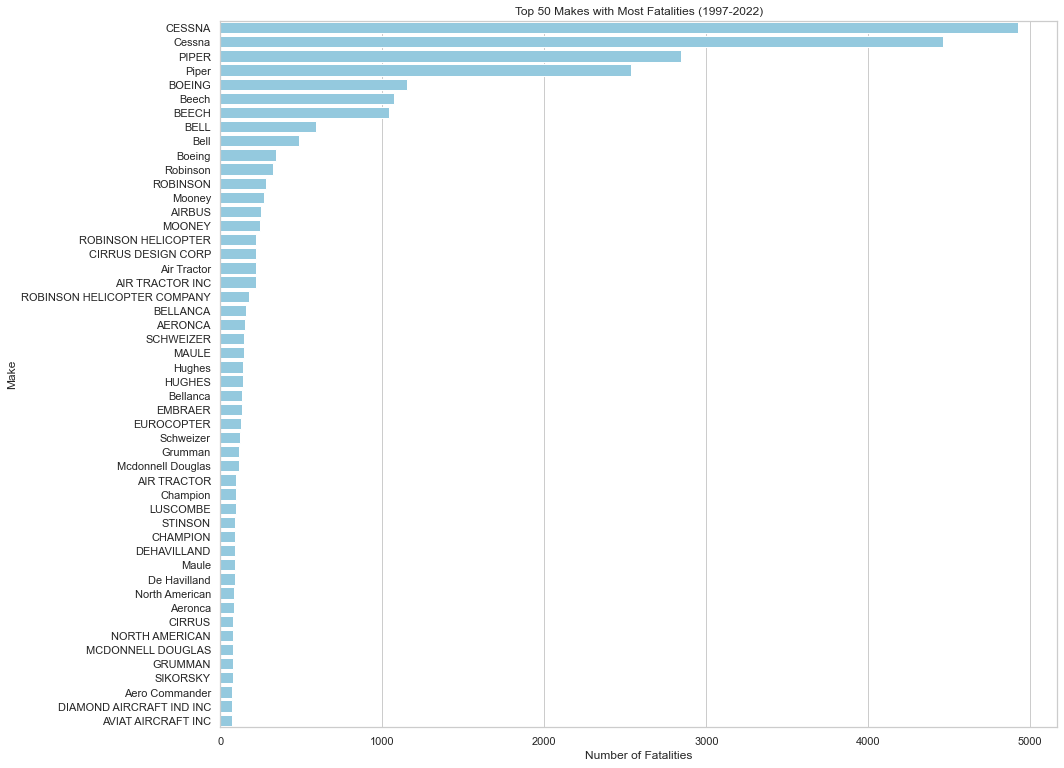

In [631]:
# Create a horizontal bar plot using Seaborn for the top 50 makes
plt.figure(figsize=(15, 13))
sns.barplot(y=fatalities_by_make.index, x=fatalities_by_make.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Number of Fatalities')
plt.ylabel('Make')
plt.title('Top 50 Makes with Most Fatalities (1997-2022)')

# Show the plot
plt.show()

# I see duplicate names on the Maker variable;

## Is this a duplicate data? 

## Or it's just not named correctly?

- Let's find out!

## If you pay attention to detail, the top names are similars, E. G. CESSNA, Cessna, this can ruin our data analysis.

- I will give the CESSNA with the most fatalities the name Cessna_one, and the Cessna with the fewest fatalities the name Cessna_two. PIPER will be Piper_one and Piper will be Piper_two and so on.

- We do not know why there are two identical calls, but we know that we must differentiate them, I will add the word one to the one with the most fatalities, perhaps because it is first generation, older, with less technology and less safety, and to the second repeated name I will add two because perhaps it is second generation, newer, with recent technology, and safer than the previous model. The reason may be broad, but that is my theory or approach.

In [553]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Check the changes
print(df1['Make'].unique())

['Stinson' 'Piper_two' 'Cessna_two' ... 'JAMES R DERNOVSEK'
 'ORLICAN S R O' 'ROYSE RALPH L']


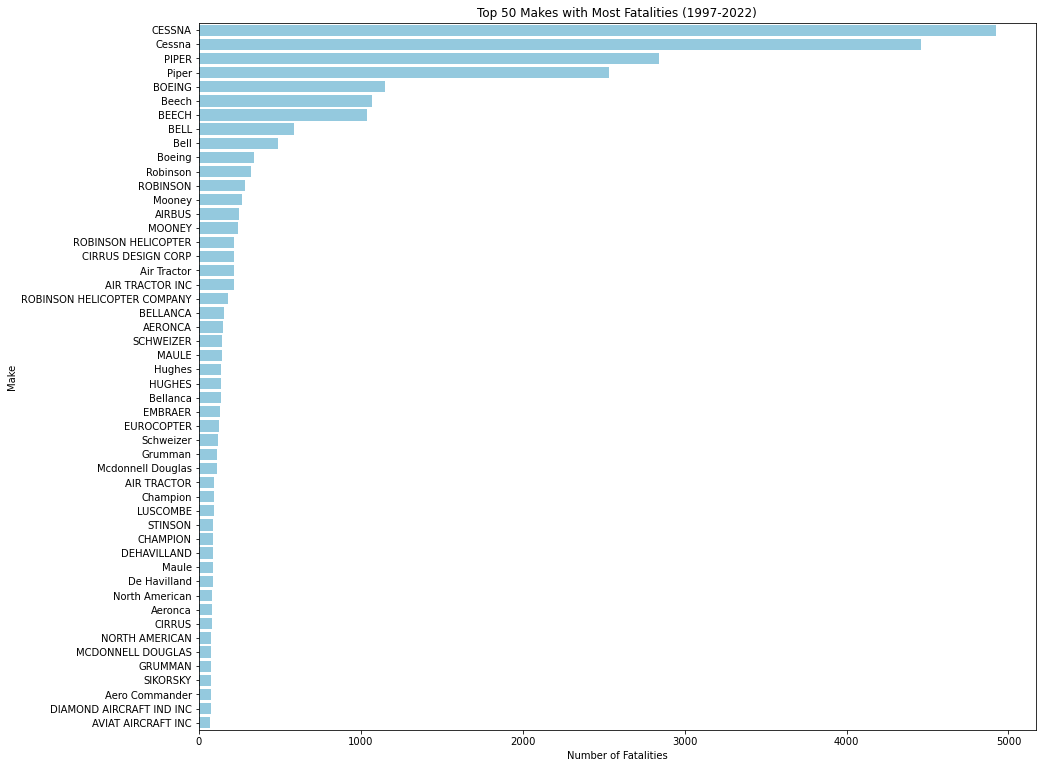

In [554]:
fatalities_by_make = filtered_df.groupby('Make')['Total.Fatal.Injuries'].count().sort_values(ascending=False).head(50)

# Create a horizontal bar plot using Seaborn for the top 50 makes
plt.figure(figsize=(15, 13))
sns.barplot(y=fatalities_by_make.index, x=fatalities_by_make.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Number of Fatalities')
plt.ylabel('Make')
plt.title('Top 50 Makes with Most Fatalities (1997-2022)')

# Show the plot
plt.show()

- THERE YOU GO

- I don't need to change all the names, I will change where the top Makers with more fatalities, because they represent the highest average fatalities, low mean (average) fatalities will not affect drastically our data.

- Lets add labels because is confusing

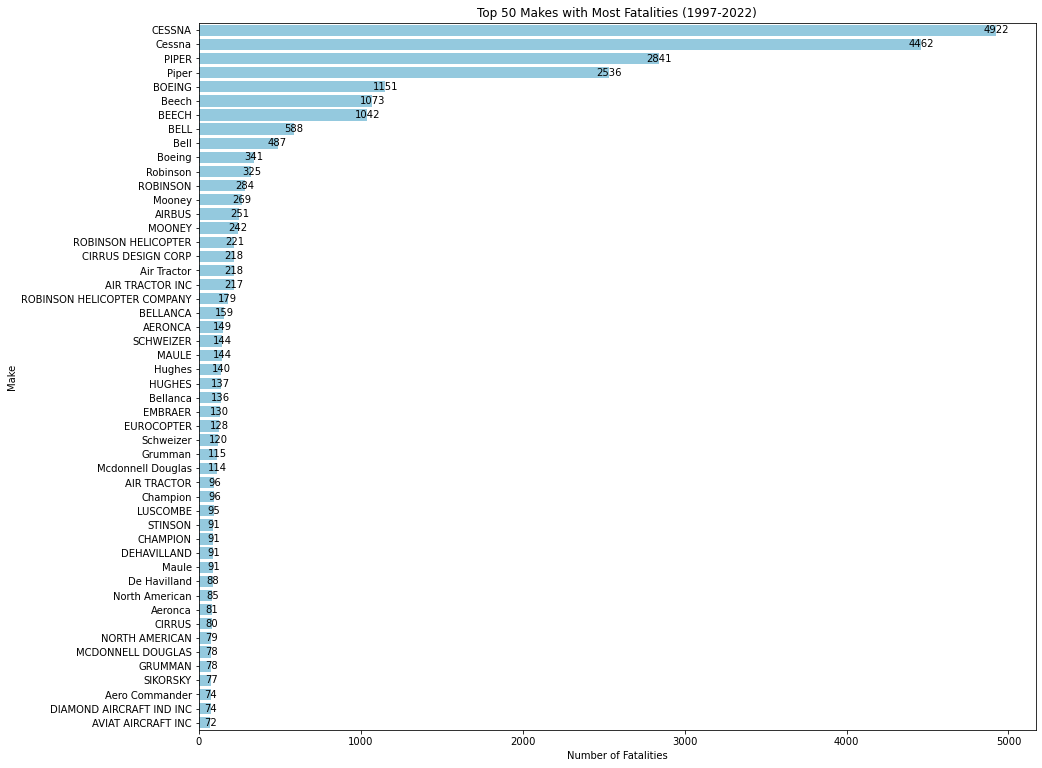

In [555]:
# Create a horizontal bar plot using Seaborn for the top 50 makes
plt.figure(figsize=(15, 13))
ax = sns.barplot(y=fatalities_by_make.index, x=fatalities_by_make.values, color='skyblue')

# Add labels with the count of fatalities per make
for i, value in enumerate(fatalities_by_make.values):
    ax.text(value + 0.1, i, str(value), ha='center', va='center', fontsize=10, color='black')

# Set plot labels and title
plt.xlabel('Number of Fatalities')
plt.ylabel('Make')
plt.title('Top 50 Makes with Most Fatalities (1997-2022)')

# Show the plot
plt.show()

- I will do top 20, top 50 is not needed. 

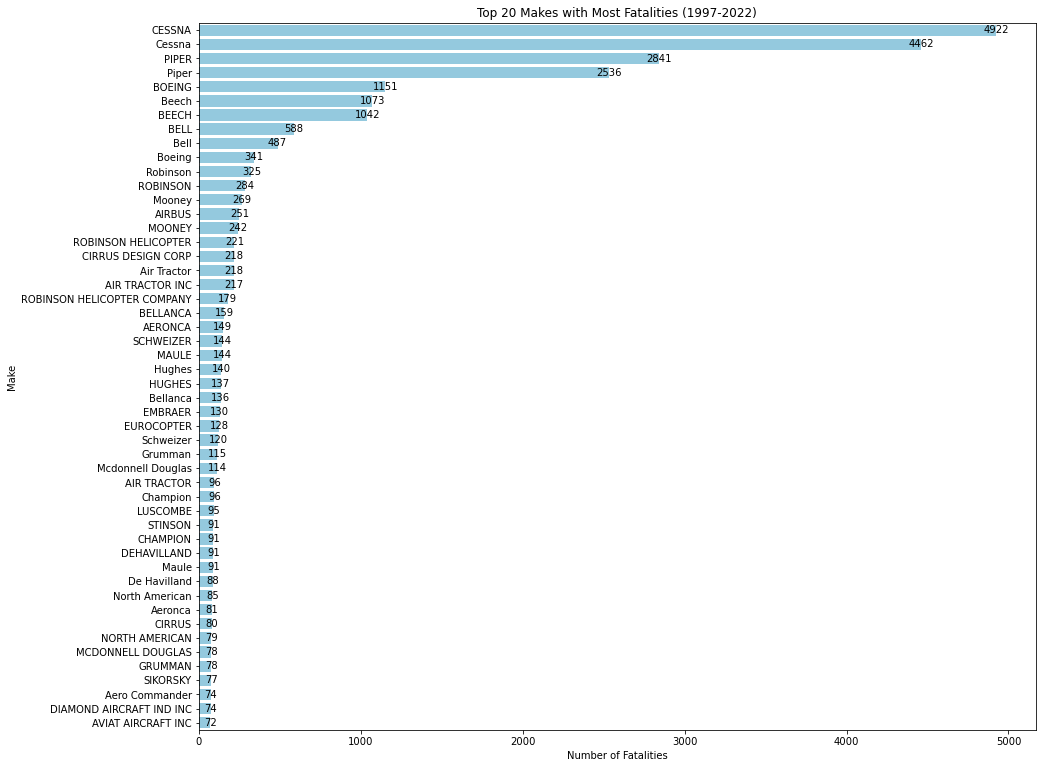

In [556]:
# Create a horizontal bar plot using Seaborn for the top 20 makes
plt.figure(figsize=(15, 13))
ax = sns.barplot(y=fatalities_by_make.index, x=fatalities_by_make.values, color='skyblue')

# Add labels with the count of fatalities per make
for i, value in enumerate(fatalities_by_make.values):
    ax.text(value + 0.1, i, str(value), ha='center', va='center', fontsize=10, color='black')

# Set plot labels and title
plt.xlabel('Number of Fatalities')
plt.ylabel('Make')
plt.title('Top 20 Makes with Most Fatalities (1997-2022)')

# Show the plot
plt.show()

## Okay, now I wonder if Cessna_one and Cessna_two are duplicate values? I'm going to compare the values in the rows.

In [557]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Filter the DataFrame for 'Cessna_one' and 'Cessna_two' in the 'Make' variable
cessna_df = df1[df1['Make'].isin(['Cessna_one', 'Cessna_two'])]

# Check for duplicate values within the 'Model' variable
duplicate_cessna_models = cessna_df[cessna_df.duplicated(subset=['Model', 'Make'], keep=False)]

# Display the rows with duplicate values
print(duplicate_cessna_models)


             Event.Id Investigation.Type Accident.Number Event.Date  \
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
6      20001218X45446           Accident      CHI81LA106 1981-08-01   
7      20020909X01562           Accident      SEA82DA022 1982-01-01   
8      20020909X01561           Accident      NYC82DA015 1982-01-01   
...               ...                ...             ...        ...   
88865  20221212106444           Accident      ERA23LA085 2022-12-12   
88871  20221220106480           Accident      WPR23LA072 2022-12-13   
88877  20221219106470           Accident      ERA23LA091 2022-12-16   
88881  20221221106483           Accident      CEN23LA067 2022-12-21   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   

               Location        Country Latitude Longitude Airport.Code  \
2         Saltville, VA  United States  36.9222  -81.8781          NaN   

In [558]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Filter the DataFrame for 'Cessna_one' and 'Cessna_two' in the 'Make' variable
cessna_df = df1[df1['Make'].isin(['Cessna_one', 'Cessna_two'])]

# Display only the 'Make' and 'Model' columns for rows with duplicate values
duplicate_cessna_models = cessna_df[cessna_df.duplicated(subset=['Model', 'Make'], keep=False)][['Make', 'Model']]

# Display the rows with 'Make' and 'Model' columns
print(duplicate_cessna_models)

             Make  Model
2      Cessna_two   172M
4      Cessna_two    501
6      Cessna_two    180
7      Cessna_two    140
8      Cessna_two   401B
...           ...    ...
88865  Cessna_one    172
88871  Cessna_one    441
88877  Cessna_one  R172K
88881  Cessna_one   172F
88887  Cessna_one   210N

[26692 rows x 2 columns]


## To much rows, I want to see the Top 30 

In [559]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Filter the DataFrame for 'Cessna_one' and 'Cessna_two' in the 'Make' variable
cessna_df = df1[df1['Make'].isin(['Cessna_one', 'Cessna_two'])]

# Show top 30 unique values and counts for 'Cessna_one'
top_30_cessna_one = cessna_df[cessna_df['Make'] == 'Cessna_one']['Model'].value_counts().head(30)

# Show top 30 unique values and counts for 'Cessna_two'
top_30_cessna_two = cessna_df[cessna_df['Make'] == 'Cessna_two']['Model'].value_counts().head(30)

# Display results
print("Top 30 unique values and counts for Cessna_one:")
print(top_30_cessna_one)

print("\nTop 30 unique values and counts for Cessna_two:")
print(top_30_cessna_two)

Top 30 unique values and counts for Cessna_one:
172      499
152      198
182      195
172S     185
172N     167
172M     131
180      127
150      113
172P      92
210       81
170B      80
140       80
A185F     76
172R      69
208B      64
182P      62
177       54
208       52
P210N     50
150L      50
170       49
182Q      46
150M      46
172RG     45
150F      42
172K      39
120       38
U206      35
U206G     34
182A      33
Name: Model, dtype: int64

Top 30 unique values and counts for Cessna_two:
152      2168
172      1254
172N      996
150       716
172M      667
172P      597
150M      539
180       494
182       464
150L      410
140       321
170B      309
182P      293
A188B     286
185       258
177       242
150F      222
150H      220
182Q      220
T210N     214
150G      213
A185F     209
150J      207
177RG     203
172RG     200
206       193
172S      186
172K      183
210       179
182A      169
Name: Model, dtype: int64


# Let's take a look with a chart.

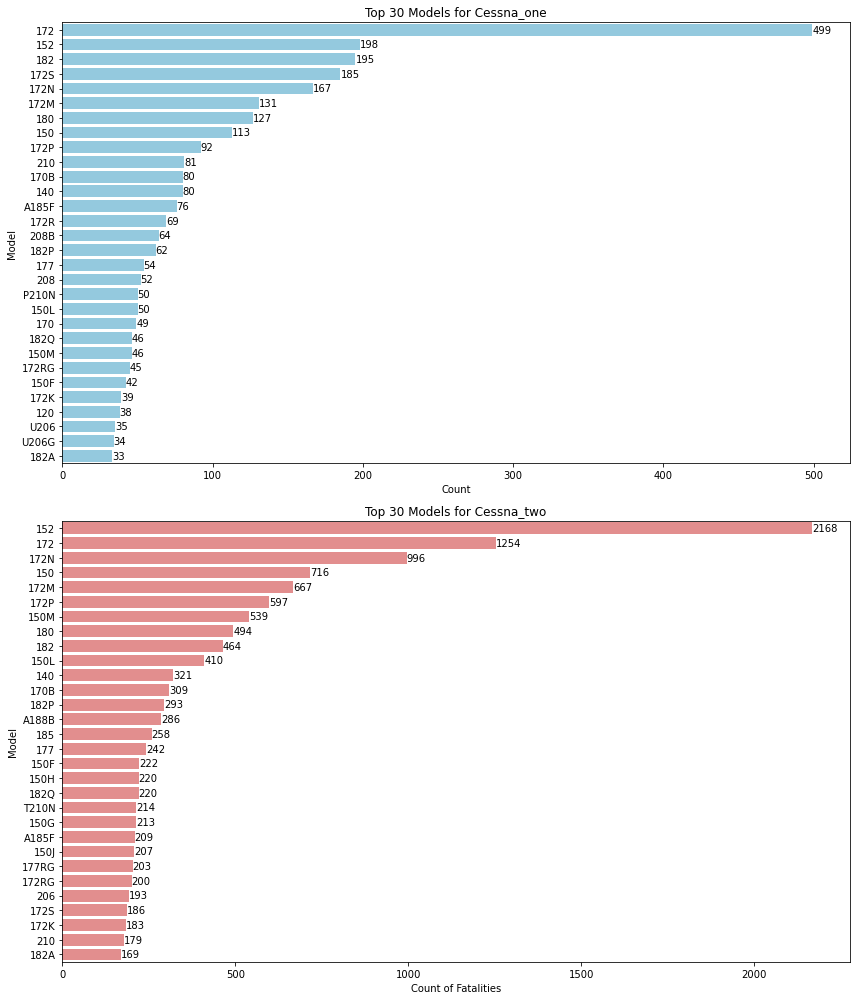

In [560]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Filter the DataFrame for 'Cessna_one' and 'Cessna_two' in the 'Make' variable
cessna_df = df1[df1['Make'].isin(['Cessna_one', 'Cessna_two'])]

# Show top 30 unique values and counts for 'Cessna_one'
top_30_cessna_one = cessna_df[cessna_df['Make'] == 'Cessna_one']['Model'].value_counts().head(30)

# Show top 30 unique values and counts for 'Cessna_two'
top_30_cessna_two = cessna_df[cessna_df['Make'] == 'Cessna_two']['Model'].value_counts().head(30)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Plot for 'Cessna_one'
bar_plot_cessna_one = sns.barplot(x=top_30_cessna_one.values, y=top_30_cessna_one.index, ax=axes[0], color='skyblue')
axes[0].set_title('Top 30 Models for Cessna_one')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Model')

# Add labels inside the bars for 'Cessna_one'
for index, value in enumerate(top_30_cessna_one.values):
    bar_plot_cessna_one.text(value, index, f'{value}', ha='left', va='center', fontsize=10)

# Plot for 'Cessna_two'
bar_plot_cessna_two = sns.barplot(x=top_30_cessna_two.values, y=top_30_cessna_two.index, ax=axes[1], color='lightcoral')
axes[1].set_title('Top 30 Models for Cessna_two')
axes[1].set_xlabel('Count of Fatalities')
axes[1].set_ylabel('Model')

# Add labels inside the bars for 'Cessna_two'
for index, value in enumerate(top_30_cessna_two.values):
    bar_plot_cessna_two.text(value, index, f'{value}', ha='left', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- after seeing the two charts above:

#  It is not duplicate data!

##  We are talking about the same Maker name (Now Cessna_one and Cessna_two). And their Models are not the same. 

## What this proves, that, first:

1. I should not delete the Maker Cessna_one and Cessna_two:

2. That each Model within the same Maker has different numbers of fatalities, because perhaps it is because each Model has different characteristics, such as type of engine and number of engines.

##  I must calculate the fatality ratio per model, according to the number of accidents (or flights carried out).

* Maybe some Model has more fatalities, because it has more flights made (Accident.Number)???

* But perhaps this unsafety Model has similar characteristics in the type of engine or number of engines in Models that have a lower fatality rate or without fatalities... (Non-Fatal value on the variable of Injury Severity!!!), but perhaps they have fewer fatalities because they have made fewer flights over time. But share same characteristics with the unsafety ones that make them unsafety...

# And it could prevent a fatality and save one or more lives!!!


##  I am going to first calculate the fatality ratio by model, for now I am just working with this Models.

- Then I want to see what other values these planes share in common. (Engine type and number of engines).


## And in the end I will see if airplanes with a low fatality ratio or without fatalities are identified in characteristics (due to fewer flights).

- Now vice versa.

## Top 30 Cessna_one models and Cessna_two models with LESS fatalitie

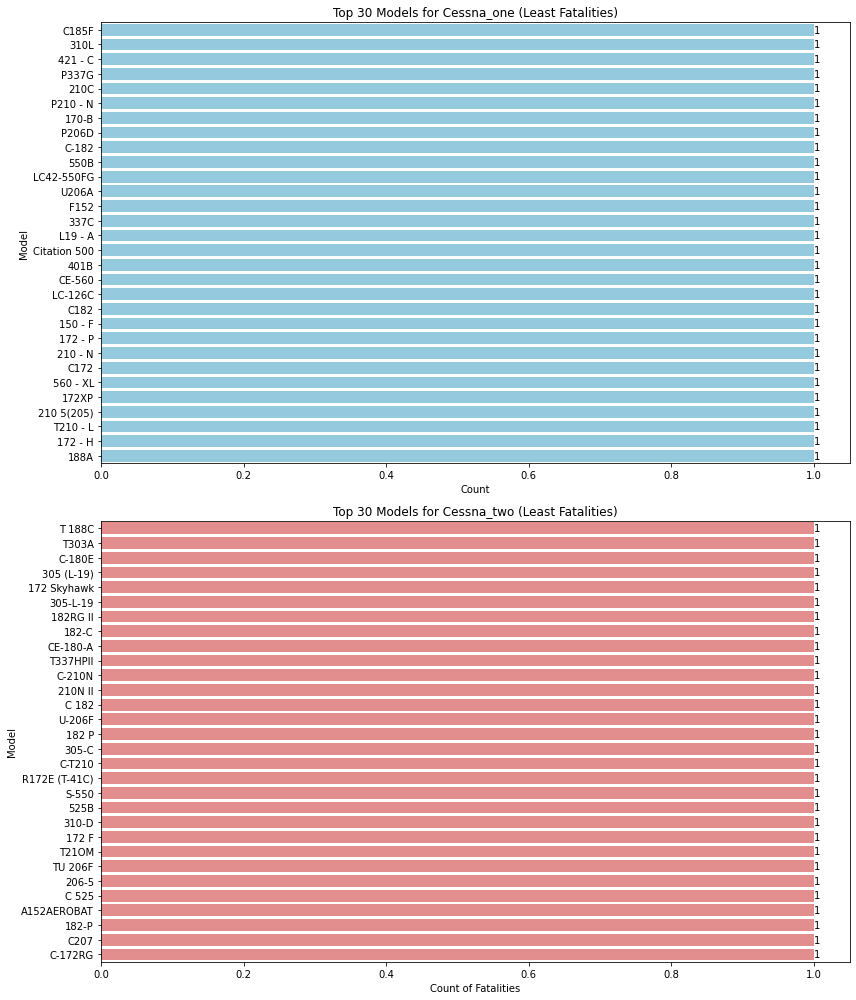

In [561]:
df1['Make'] = df1['Make'].replace({
    'CESSNA': 'Cessna_one',
    'Cessna': 'Cessna_two',
    'PIPER': 'Piper_one',
    'Piper': 'Piper_two',
    'BOEING': 'Boeing_one',
    'Beech': 'Beech_one',
    'BEECH': 'Beech_two',
    'BELL': 'Bell_one',
    'Bell': 'Bell_two',
    'Boeing': 'Boeing_two',
    'Robinson': 'Robinson_one',
    'ROBINSON': 'Robinson_two'
})

# Filter the DataFrame for 'Cessna_one' and 'Cessna_two' in the 'Make' variable
cessna_df = df1[df1['Make'].isin(['Cessna_one', 'Cessna_two'])]

# Show top 30 unique values and counts for 'Cessna_one' in ascending order
top_30_cessna_one = cessna_df[cessna_df['Make'] == 'Cessna_one']['Model'].value_counts().sort_values().head(30)

# Show top 30 unique values and counts for 'Cessna_two' in ascending order
top_30_cessna_two = cessna_df[cessna_df['Make'] == 'Cessna_two']['Model'].value_counts().sort_values().head(30)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Plot for 'Cessna_one'
bar_plot_cessna_one = sns.barplot(x=top_30_cessna_one.values, y=top_30_cessna_one.index, ax=axes[0], color='skyblue')
axes[0].set_title('Top 30 Models for Cessna_one (Least Fatalities)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Model')

# Add labels inside the bars for 'Cessna_one'
for index, value in enumerate(top_30_cessna_one.values):
    bar_plot_cessna_one.text(value, index, f'{value}', ha='left', va='center', fontsize=10)

# Plot for 'Cessna_two'
bar_plot_cessna_two = sns.barplot(x=top_30_cessna_two.values, y=top_30_cessna_two.index, ax=axes[1], color='lightcoral')
axes[1].set_title('Top 30 Models for Cessna_two (Least Fatalities)')
axes[1].set_xlabel('Count of Fatalities')
axes[1].set_ylabel('Model')

# Add labels inside the bars for 'Cessna_two'
for index, value in enumerate(top_30_cessna_two.values):
    bar_plot_cessna_two.text(value, index, f'{value}', ha='left', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Let's see ratio of fatality per ENGINE TYPES.

- First let's break down the types of engine and the average.

In [562]:
# Extract top 30 models for Cessna_one and Cessna_two with more fatalities
top_30_cessna_one_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_one'].nlargest(30, 'Total.Fatal.Injuries')
top_30_cessna_two_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_two'].nlargest(30, 'Total.Fatal.Injuries')

# Concatenate the DataFrames for Cessna_one and Cessna_two
top_30_cessna_one_two_fatalities = pd.concat([top_30_cessna_one_fatalities, top_30_cessna_two_fatalities])

# Calculate the percentage of each engine type among the selected models
engine_type_percentage = (
    top_30_cessna_one_two_fatalities['Engine.Type'].value_counts(normalize=True) * 100
).sort_values(ascending=False)

print("Engine Types Ordered by Percentage:")
print(engine_type_percentage)

Engine Types Ordered by Percentage:
Reciprocating    57.142857
Unknown          21.428571
Turbo Prop       14.285714
Turbo Fan         7.142857
Name: Engine.Type, dtype: float64


- Reciprocating 57.14%
- Unknown 21.42%
- Turbo Prop 14.28%
- Turbo Fan 7.142%

The Unknown are more likely to be Reciprocating, because the mean (average) is higher, but since Safety is important here, we can not assume that and apply the average of Unknown to Reciprocating because we could have some percetage of engine type of Turbo Prop, that could lead us to provoque fatalities we can avoid. So now I will try to make more filters by number of engines!

# Ratio of fatalities per ENGINE TYPES

In [563]:
# Extract top 30 models for Cessna_one and Cessna_two with more fatalities
top_30_cessna_one_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_one'].nlargest(30, 'Total.Fatal.Injuries')
top_30_cessna_two_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_two'].nlargest(30, 'Total.Fatal.Injuries')

# Concatenate the DataFrames for Cessna_one and Cessna_two
top_30_cessna_one_two_fatalities = pd.concat([top_30_cessna_one_fatalities, top_30_cessna_two_fatalities])

# Calculate the average engine type for the selected models
average_engine_type = top_30_cessna_one_two_fatalities.groupby('Model')['Engine.Type'].value_counts().idxmax()[1]

print(f"The average engine type for the top 30 Cessna_one and Cessna_two models with more fatalities is: {average_engine_type}")

The average engine type for the top 30 Cessna_one and Cessna_two models with more fatalities is: Turbo Prop


## The result above shows us that:

# TURBO PROP, caused a higher fatality ratio in accidents on the Makers Cessna_one and Cessna_two... !

## Is this due to the number of engines per engine type?

# Let's take a look to ENGINE NUMBERS.

In [564]:
# Filter data for rows where 'Make' is either 'Cessna_one' or 'Cessna_two'
cessna_data = df1[(df1['Make'] == 'Cessna_one') | (df1['Make'] == 'Cessna_two')]

# Get unique values and count of distinct values for 'Number.of.Engines'
unique_values = cessna_data['Number.of.Engines'].unique()
count_distinct = cessna_data['Number.of.Engines'].nunique()

print(f'Unique values for Number.of.Engines: {unique_values}')
print(f'Count of distinct values for Number.of.Engines: {count_distinct}')

Unique values for Number.of.Engines: [ 1. nan  2.  4.  0.]
Count of distinct values for Number.of.Engines: 4


In [565]:
# Filter data for rows where 'Make' is 'Cessna_one'
cessna_one_data = df1[df1['Make'] == 'Cessna_one']

# Calculate the average number of engines
average_engines_cessna_one = cessna_one_data['Number.of.Engines'].mean()

print(f'Average number of engines for Cessna_one: {average_engines_cessna_one}')

Average number of engines for Cessna_one: 1.0931228861330327


In [566]:
# Filter data for rows where 'Make' is 'Cessna_two'
cessna_two_data = df1[df1['Make'] == 'Cessna_two']

# Calculate the average number of engines
average_engines_cessna_two = cessna_two_data['Number.of.Engines'].mean()
    
print(f'Average number of engines for Cessna_two: {average_engines_cessna_two}')

Average number of engines for Cessna_two: 1.0853137209836818




- The data above shows that for the Makers Cessna_one and Cessna_two, their type of engine with the highest rate of fatalities per accident was the TURBO PROP engine, but the average number of engines that the Turbo Prop has in the data frame is 1 engine per Aircraft.

- Which is illogical because no airplane can fly with a single engine, and airplanes at least need two engines.

- Then the column of number of engines refers to the number of engines that remained in operation after the accident.

- Since, these airplanes with one engine were the ones with the highest fatality rate per accident.

- So it could be said that accidents where only one engine or less than one remained in operation are airplanes that are unsafe, and that in the future, if there are more flights with these airplanes, there is a risk of more fatalities, which will increase the accident rate. fatalities in those Models.

- Therefore, values of 0 or 1 in the number of engines variable are unsafe aircraft and I should remove them from my data frame.

- Unless that value of 1 engine is a Helicopter!

- I write a code that eliminates accidents with a value of 0 or 1 in the number of engines variable and that are not equal to Helicopter.

- Something like this =< than 1 and =! to 'Helicopter' (=! for unequal), which does not eliminate rows that are from Helicopters.

In [567]:
# Extract top 30 models for Cessna_one and Cessna_two with least fatalities
top_30_cessna_one_least_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_one'].nsmallest(30, 'Total.Fatal.Injuries')
top_30_cessna_two_least_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_two'].nsmallest(30, 'Total.Fatal.Injuries')

# Concatenate the DataFrames for Cessna_one and Cessna_two
top_30_cessna_one_two_least_fatalities = pd.concat([top_30_cessna_one_least_fatalities, top_30_cessna_two_least_fatalities])

# Calculate the average engine type among the selected models
average_engine_type_least_fatalities = top_30_cessna_one_two_least_fatalities['Engine.Type'].mode()

print("Average Engine Type (Least Fatalities):")
print(average_engine_type_least_fatalities)

Average Engine Type (Least Fatalities):
0    Reciprocating
dtype: object


# - The result above shows that:

# Reciprocating, caused less ratio in fatalities in accidents on the Makers Cessna_one and Cessna_two... !

# The ratio is less than 1%

## Reciprocating engine saved lives!!

In [568]:
# Extract top 30 models for Cessna_one and Cessna_two with least fatalities
top_30_cessna_one_least_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_one'].nsmallest(30, 'Total.Fatal.Injuries')
top_30_cessna_two_least_fatalities = cessna_df[cessna_df['Make'] == 'Cessna_two'].nsmallest(30, 'Total.Fatal.Injuries')

# Concatenate the DataFrames for Cessna_one and Cessna_two
top_30_cessna_one_two_least_fatalities = pd.concat([top_30_cessna_one_least_fatalities, top_30_cessna_two_least_fatalities])

# Calculate the percentage of each engine type among the selected models
engine_type_percentage_least_fatalities = (
    top_30_cessna_one_two_least_fatalities['Engine.Type'].value_counts(normalize=True) * 100
).sort_values(ascending=False)

print("Engine Types Ordered by Percentage (Least Fatalities):")
print(engine_type_percentage_least_fatalities)

Engine Types Ordered by Percentage (Least Fatalities):
Reciprocating    91.666667
Turbo Fan         5.000000
Turbo Prop        3.333333
Name: Engine.Type, dtype: float64


# The Reciprocating engine, will help us to narrow our list of Top Safety Aircrafts. 

# The codes below are only showing that the average number of motors per motor Reciprocating also the average is 1!

## What does this mean??

# Means that these Reciprocating engines were involved in accidents but their fatality rate in these accidents was WAY LOWERR than the Turbo Prop engine, aircrafts with Reciprocating engine safer airplanes!!, because the type of engine is better.

# Turbo prop engines are dangerous!! and they should be removed from the market... !

# Aircrafts with Reciprocating engine are safer airplanes!!

## On the contrary, Turbo prop engines are dangerous!! 

In [569]:
# Filter data for rows where 'Make' is 'Cessna_one' and 'Engine.Type' is 'Reciprocating'
cessna_one_reciprocating_data = df1[(df1['Make'] == 'Cessna_one') & (df1['Engine.Type'] == 'Reciprocating')]

# Calculate the average number of engines
average_engines_cessna_one_reciprocating = cessna_one_reciprocating_data['Number.of.Engines'].mean()

print(f'Average number of reciprocating engines for Cessna_one: {average_engines_cessna_one_reciprocating}')

Average number of reciprocating engines for Cessna_one: 1.0686718126164494


In [570]:
# Filter data for rows where 'Make' is 'Cessna_two' and 'Engine.Type' is 'Reciprocating'
cessna_two_reciprocating_data = df1[(df1['Make'] == 'Cessna_two') & (df1['Engine.Type'] == 'Reciprocating')]

# Calculate the average number of engines
average_engines_cessna_two_reciprocating = cessna_two_reciprocating_data['Number.of.Engines'].mean()

print(f'Average number of reciprocating engines for Cessna_two: {average_engines_cessna_two_reciprocating}')

Average number of reciprocating engines for Cessna_two: 1.0790152403282531


# Let's start cleaning the data by start removing the aircrafts that are not safety!

## I'm going to start removing those planes that have had fatalities in the values!

- I will start with the variable/column of Total.Fatal.Injuries

# - The next code filters the DataFrame to keep only rows where 'Total.Fatal.Injuries' is less than 1 and 'Event.Date' is after 01/01/1997.

## I will delete the Accident Number rows with Fatalities.

In [577]:
# Assuming 'df1' is your DataFrame
df1 = df1[(df1['Total.Fatal.Injuries'] < 1) & (df1['Event.Date'] > '1997-01-01')]

# Display the resulting DataFrame
print(df1)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41098  20001208X07328           Accident      MIA97LA056 1997-01-02   
41101  20001208X07250           Accident      ANC97LA017 1997-01-02   
41102  20001208X07281           Accident      FTW97LA074 1997-01-02   
41103  20001208X07258           Accident      ATL97LA032 1997-01-02   
41104  20001208X07348           Accident      NYC97LA041 1997-01-03   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

                  Location        Country Latitude Longitude Airport.Code  \
41098         LAKELAND, FL  United States      NaN       NaN          

In [578]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41098,20001208X07328,Accident,MIA97LA056,1997-01-02,"LAKELAND, FL",United States,NaN,NaN,LAL,LAKELAND LINDER REGIONAL,...,NaN,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,01-08-2001,FL
41101,20001208X07250,Accident,ANC97LA017,1997-01-02,"NOME, AK",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,Takeoff,Probable Cause,21-05-1998,AK
41102,20001208X07281,Accident,FTW97LA074,1997-01-02,"RIO GRANDE CITY, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,25-08-1997,TX
41103,20001208X07258,Accident,ATL97LA032,1997-01-02,"ANDERSON, SC",United States,NaN,NaN,AND,ANDERSON COUNTY,...,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,05-09-1997,SC
41104,20001208X07348,Accident,NYC97LA041,1997-01-03,"LINDEN, NJ",United States,NaN,NaN,LDJ,LINDEN,...,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,25-08-1997,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,UT


# Now I will delete the Accident Number rows with Minor and Serious Injuries.

In [579]:
# 'df1' DataFrame
df1 = df1[(df1['Total.Serious.Injuries'] >= 1) | (df1['Total.Minor.Injuries'] >= 1) & (df1['Event.Date'] > '1997-01-01')]

# Display the resulting DataFrame
print(df1)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41098  20001208X07328           Accident      MIA97LA056 1997-01-02   
41101  20001208X07250           Accident      ANC97LA017 1997-01-02   
41110  20001208X07308           Accident      LAX97FA082 1997-01-05   
41114  20001208X07347           Accident      NYC97LA040 1997-01-07   
41116  20001208X07284           Accident      FTW97LA079 1997-01-07   
...               ...                ...             ...        ...   
88878  20221227106496           Accident      WPR23LA074 2022-12-17   
88881  20221221106483           Accident      CEN23LA067 2022-12-21   
88882  20221222106486           Accident      CEN23LA068 2022-12-21   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

                Location         Country Latitude Longitude Airport.Code  \
41098       LAKELAND, FL   United States      NaN       NaN          LA

In [580]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41098,20001208X07328,Accident,MIA97LA056,1997-01-02,"LAKELAND, FL",United States,NaN,NaN,LAL,LAKELAND LINDER REGIONAL,...,NaN,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,01-08-2001,FL
41101,20001208X07250,Accident,ANC97LA017,1997-01-02,"NOME, AK",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,Takeoff,Probable Cause,21-05-1998,AK
41110,20001208X07308,Accident,LAX97FA082,1997-01-05,"BULLHEAD CITY, AZ",United States,NaN,NaN,NaN,NaN,...,Fng Aviation Inc (dba: Skylink Charter),0.0,0.0,2.0,19.0,VMC,Cruise,Probable Cause,25-03-1998,AZ
41114,20001208X07347,Accident,NYC97LA040,1997-01-07,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,5.0,259.0,VMC,Cruise,Probable Cause,10-04-1998,AN
41116,20001208X07284,Accident,FTW97LA079,1997-01-07,"WELLINGTON, CO",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,2.0,0.0,VMC,Landing,Probable Cause,25-08-1997,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"Cottonwood, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022,CA
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022,MI
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022,LA
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,MD


# I will delete the Accident Number rows with 0 value on Total Uninjured.

## If they were 0 Uninjured, it means that everyone had an injury...

In [581]:
# 'df1' is DataFrame
df1 = df1[(df1['Total.Uninjured'] != 0) & (df1['Event.Date'] > '1997-01-01')]

# Display the resulting DataFrame
print(df1)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41101  20001208X07250           Accident      ANC97LA017 1997-01-02   
41110  20001208X07308           Accident      LAX97FA082 1997-01-05   
41114  20001208X07347           Accident      NYC97LA040 1997-01-07   
41118  20001208X07286           Accident      FTW97LA081 1997-01-07   
41126  20001208X07345           Accident      NYC97FA045 1997-01-10   
...               ...                ...             ...        ...   
88834  20221130106387           Accident      CEN23LA056 2022-11-29   
88854  20221209106435           Accident      WPR23LA061 2022-12-07   
88855  20221212106439           Accident      DCA23LA093 2022-12-08   
88882  20221222106486           Accident      CEN23LA068 2022-12-21   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

                Location         Country Latitude Longitude Airport.Code  \
41101           NOME, AK   United States      NaN       NaN          Na

In [582]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41101,20001208X07250,Accident,ANC97LA017,1997-01-02,"NOME, AK",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,Takeoff,Probable Cause,21-05-1998,AK
41110,20001208X07308,Accident,LAX97FA082,1997-01-05,"BULLHEAD CITY, AZ",United States,NaN,NaN,NaN,NaN,...,Fng Aviation Inc (dba: Skylink Charter),0.0,0.0,2.0,19.0,VMC,Cruise,Probable Cause,25-03-1998,AZ
41114,20001208X07347,Accident,NYC97LA040,1997-01-07,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,5.0,259.0,VMC,Cruise,Probable Cause,10-04-1998,AN
41118,20001208X07286,Accident,FTW97LA081,1997-01-07,"HOUSTON, TX",United States,NaN,NaN,IAH,GEORGE BUSH INTERNATIONAL,...,(dba: Jet Link),0.0,0.0,3.0,13.0,VMC,Taxi,Probable Cause,07-01-1998,TX
41126,20001208X07345,Accident,NYC97FA045,1997-01-10,"BANGOR, ME",United States,NaN,NaN,BGR,BANGOR INTL,...,Mesa Airlines Inc. (dba: Usair Express),0.0,0.0,2.0,9.0,IMC,Takeoff,Probable Cause,30-04-1998,ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88834,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Batesville Regional Airport,...,Creamer Pilot Services LLC,0.0,2.0,0.0,6.0,IMC,NaN,NaN,14-12-2022,AR
88854,20221209106435,Accident,WPR23LA061,2022-12-07,"Waimea, HI",United States,020019N,1554745W,NaN,NaN,...,NaN,0.0,1.0,0.0,6.0,NaN,NaN,NaN,09-12-2022,HI
88855,20221212106439,Accident,DCA23LA093,2022-12-08,"Newark, NJ",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,1.0,175.0,NaN,NaN,NaN,12-12-2022,NJ
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022,LA


# I will delete the Accident Number rows where the variable Injury Severity has the values of Minor, Serious and Incident.

In [583]:
#'df1' is DataFrame
injury_severity_counts = df1['Injury.Severity'].value_counts()

# Display the counts
print(injury_severity_counts)

Non-Fatal    1803
Minor          49
Serious        32
Incident       17
Name: Injury.Severity, dtype: int64


In [587]:
#'df1' is DataFrame
df1 = df1[~df1['Injury.Severity'].isin(['Minor', 'Serious', 'Incident'])]

# Display the resulting DataFrame
print(df1)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41101  20001208X07250           Accident      ANC97LA017 1997-01-02   
41110  20001208X07308           Accident      LAX97FA082 1997-01-05   
41114  20001208X07347           Accident      NYC97LA040 1997-01-07   
41118  20001208X07286           Accident      FTW97LA081 1997-01-07   
41126  20001208X07345           Accident      NYC97FA045 1997-01-10   
...               ...                ...             ...        ...   
87190  20211119104277           Accident      ERA22LA067 2021-11-19   
87193  20211126104324           Accident      GAA22WA036 2021-11-19   
87202  20211216104411           Accident      ERA22LA088 2021-11-21   
87253  20211215104409           Accident      CEN22LA075 2021-12-09   
87276  20211221104429           Accident      WPR22LA066 2021-12-20   

                 Location         Country Latitude Longitude Airport.Code  \
41101            NOME, AK   United States      NaN       NaN          

In [588]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41101,20001208X07250,Accident,ANC97LA017,1997-01-02,"NOME, AK",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,Takeoff,Probable Cause,21-05-1998,AK
41110,20001208X07308,Accident,LAX97FA082,1997-01-05,"BULLHEAD CITY, AZ",United States,NaN,NaN,NaN,NaN,...,Fng Aviation Inc (dba: Skylink Charter),0.0,0.0,2.0,19.0,VMC,Cruise,Probable Cause,25-03-1998,AZ
41114,20001208X07347,Accident,NYC97LA040,1997-01-07,ATLANTIC OCEAN,ATLANTIC OCEAN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,5.0,259.0,VMC,Cruise,Probable Cause,10-04-1998,AN
41118,20001208X07286,Accident,FTW97LA081,1997-01-07,"HOUSTON, TX",United States,NaN,NaN,IAH,GEORGE BUSH INTERNATIONAL,...,(dba: Jet Link),0.0,0.0,3.0,13.0,VMC,Taxi,Probable Cause,07-01-1998,TX
41126,20001208X07345,Accident,NYC97FA045,1997-01-10,"BANGOR, ME",United States,NaN,NaN,BGR,BANGOR INTL,...,Mesa Airlines Inc. (dba: Usair Express),0.0,0.0,2.0,9.0,IMC,Takeoff,Probable Cause,30-04-1998,ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87190,20211119104277,Accident,ERA22LA067,2021-11-19,"Glens Falls, NY",United States,431834N,0733838E,GFL,FLOYD BENNETT MEML,...,WARREN COUNTY FLYING CLUB INC,0.0,1.0,0.0,1.0,VMC,NaN,NaN,01-12-2021,NY
87193,20211126104324,Accident,GAA22WA036,2021-11-19,"Caroebe, OF",Brazil,005248N,0594147W,SJLJ,Jatapuzinho Aerodrome,...,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,OF
87202,20211216104411,Accident,ERA22LA088,2021-11-21,"Atlantic Ocean, OF",United States,221341N,0713123W,NaN,NaN,...,NetJets Aviation Inc,0.0,0.0,1.0,6.0,VMC,NaN,NaN,NaN,OF
87253,20211215104409,Accident,CEN22LA075,2021-12-09,"Rockwall, TX",United States,325550N,0096268W,F46,RALPH M HALL/ROCKWALL MUNI,...,MMM FRIEMEL INC,0.0,1.0,0.0,2.0,VMC,NaN,NaN,NaN,TX


- This code uses the isin method to check if the 'Injury.Severity' is not in the specified list, and ~ is used to negate the condition, keeping only the rows where 'Injury.Severity' is not 'Minor', 'Serious', or 'Incident'.

# An insight about the concept on Incident on Aviation.

Incident means an occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

Incident. An occurrence, other than an accident, associated with the operation of an aircraft which affects or could affect the safety of operation. Serious incident. An incident involving circumstances indicating that an accident nearly occurred.

An accident is an event that has unintentionally happened, that results in damage, injury or harm. An incident is an event that has unintentionally happened, but this may not result in damage, harm or injury. Therefore, every accident can be an incident. However not all incidents can be termed as an accident.


# Safety is priority in this Data Analysis!

## That's why I removed the accident rows where the value is equal to Incident, Fatal, Minor and Serious. 

- The values are object, string (not float or integer)

In [589]:
# 'df1' is DataFrame
distinct_severity_count = df1['Injury.Severity'].nunique()

print("Count of distinct values in 'Injury.Severity':", distinct_severity_count)

Count of distinct values in 'Injury.Severity': 1


- We are good, we only have Non Fatal on our data, which means are accidents without fatalities (also no recorded injuries).

In [605]:
# 'df1'  DataFrame
injury_severity_dtype = df1['Injury.Severity'].dtype

# Display the data type
print(injury_severity_dtype)

object


# Now I will delete accident rows on the variable Aircraft Damage.

In [608]:
# Count distinct values in the 'Aircraft.damage' column
damage_counts = df1['Aircraft.damage'].value_counts()

# Display the result
print(damage_counts)

Series([], Name: Aircraft.damage, dtype: int64)


 - Somehow I deleted the values of aircraft damage of destroyed, substancial, unkown and minor. So I cant count them...

# I will remove/eliminate the below accidents with aircraft damage or unknown.

## Substantial
- I will eliminate the Events ID rows with aircraft damage with the substantial filter because of safety reasons, also it would be very expensive to repair the main structure of the plane.

## Destroyed
- I will eliminate the destroyed ones for security and safety reasons obviously, also you cannot buy a plane that is already destroyed, well, you can buy but only if youre not smart...

## Unknown 
- I am also going to eliminate the Unknowns because the result is uncertain. We don't have certainty, why take the risk? Yes, we have 567 airplanes that are certain to have had minimal damage. It's logic or common sense.

In [612]:
# Define the values to be removed
values_to_remove = ['Substantial', 'Destroyed', 'Unknown', 'Minor']

# Filter rows that do not contain the specified values
df1 = df1[~df1['Aircraft.damage'].isin(values_to_remove)]

# Display the modified DataFrame
print(df1)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41197  20001208X07272           Accident      CHI97LA060 1997-01-28   
41299  20001208X07429           Accident      LAX97LA112 1997-02-25   
41310  20001208X07572           Accident      LAX97LA118 1997-03-01   
41316  20001208X07501           Accident      CHI97LA078 1997-03-02   
41437  20001208X07493           Accident      ATL97LA055 1997-03-26   
...               ...                ...             ...        ...   
87017  20211014104101           Accident      WPR22LA010 2021-10-05   
87037  20211025104153           Accident      DCA22LA012 2021-10-09   
87092  20211025104161           Accident      DCA22LA015 2021-10-23   
87202  20211216104411           Accident      ERA22LA088 2021-11-21   
87276  20211221104429           Accident      WPR22LA066 2021-12-20   

                 Location        Country Latitude Longitude Airport.Code  \
41197  CAPE GIRARDEAU, MO  United States      NaN       NaN          Na

In [613]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41197,20001208X07272,Accident,CHI97LA060,1997-01-28,"CAPE GIRARDEAU, MO",United States,NaN,NaN,NaN,NaN,...,Trans World Airlines (dba: Twa),0.0,1.0,1.0,110.0,VMC,Descent,Probable Cause,05-09-1997,MO
41299,20001208X07429,Accident,LAX97LA112,1997-02-25,"SAN FRANCISCO, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,109.0,VMC,Descent,Probable Cause,30-05-1997,CA
41310,20001208X07572,Accident,LAX97LA118,1997-03-01,"PARKER, AZ",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Maneuvering,Probable Cause,30-05-1997,AZ
41316,20001208X07501,Accident,CHI97LA078,1997-03-02,"CHICAGO, IL",United States,NaN,NaN,NaN,NaN,...,(dba: Mexicana Airlines),0.0,4.0,18.0,180.0,VMC,Descent,Probable Cause,08-12-1999,IL
41437,20001208X07493,Accident,ATL97LA055,1997-03-26,"CHAMBLEE, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Descent,Probable Cause,15-12-1997,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87017,20211014104101,Accident,WPR22LA010,2021-10-05,"Alburquerque, NM",United States,351132N,0106377W,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,NaN,NaN,NaN,NM
87037,20211025104153,Accident,DCA22LA012,2021-10-09,"Lexington, VA",United States,037420N,0079240W,NaN,NaN,...,SOUTHWEST AIRLINES CO,0.0,0.0,1.0,111.0,NaN,NaN,NaN,NaN,VA
87092,20211025104161,Accident,DCA22LA015,2021-10-23,"Miami, FL",United States,254749N,0801634E,NaN,NaN,...,Envoy Air,0.0,0.0,1.0,62.0,NaN,NaN,NaN,NaN,FL
87202,20211216104411,Accident,ERA22LA088,2021-11-21,"Atlantic Ocean, OF",United States,221341N,0713123W,NaN,NaN,...,NetJets Aviation Inc,0.0,0.0,1.0,6.0,VMC,NaN,NaN,NaN,OF


In [615]:
# Given values
substantial_count = 13985
minor_count = 567
destroyed_count = 275
unknown_count = 49

# Calculate the mean for each value
substantial_mean = substantial_count / 4
minor_mean = minor_count / 4
destroyed_mean = destroyed_count / 4
unknown_mean = unknown_count / 4

# Display the mean for each value
print(f"Mean Average for Substantial: {substantial_mean}")
print(f"Mean Average for Minor: {minor_mean}")
print(f"Mean Average for Destroyed: {destroyed_mean}")
print(f"Mean Average for Unknown: {unknown_mean}")


Mean Average for Substantial: 3496.25
Mean Average for Minor: 141.75
Mean Average for Destroyed: 68.75
Mean Average for Unknown: 12.25


- Adding NaN on the count

In [616]:
# Given values
substantial_count = 13985
minor_count = 567
destroyed_count = 275
unknown_count = 49
NaN_count = 518  # Assuming this is the count of NaN values

# Calculate the mean for each value
substantial_mean = substantial_count / 5
minor_mean = minor_count / 5
destroyed_mean = destroyed_count / 5
unknown_mean = unknown_count / 5
NaN_mean = NaN_count / 5

# Calculate the total mean
total_mean = substantial_mean + minor_mean + destroyed_mean + unknown_mean + NaN_mean

# Calculate the percentage contribution of each mean
substantial_percentage = (substantial_mean / total_mean) * 100
minor_percentage = (minor_mean / total_mean) * 100
destroyed_percentage = (destroyed_mean / total_mean) * 100
unknown_percentage = (unknown_mean / total_mean) * 100
NaN_percentage = (NaN_mean / total_mean) * 100

# Display the percentage contribution for each value
print(f"Percentage Contribution for Substantial: {substantial_percentage:.2f}%")
print(f"Percentage Contribution for Minor: {minor_percentage:.2f}%")
print(f"Percentage Contribution for Destroyed: {destroyed_percentage:.2f}%")
print(f"Percentage Contribution for Unknown: {unknown_percentage:.2f}%")
print(f"Percentage Contribution for NaN: {NaN_percentage:.2f}%")


Percentage Contribution for Substantial: 90.85%
Percentage Contribution for Minor: 3.68%
Percentage Contribution for Destroyed: 1.79%
Percentage Contribution for Unknown: 0.32%
Percentage Contribution for NaN: 3.36%


#  518 accidents with Nan are more likely to be substantial aircraft damage.

## Because of the mean (average) of each damage!

- So if I have 518 accidents with Nan (Not A Value and/or Not A Number), it is more likely that these 518 NaN are a substantial aircraft damage than a Minor one, because the damage filtered by Substantial is 90.85% of the damage in the Aircraft Damage column.

- I am thinking on choose the strategy that makes sense based on my data and analysis requirements. 

- If the NaN values represent a significant portion of my data, it's important to handle them appropriately to avoid bias in my analysis.

- In this case, if this 518 NaN rows are a very tiny portion of my original rows of 88,889 rows.

- Adding, those 518 NaN is approximately 0.583% of 88,888 (first data frame). Is a low percentage, and it will not affect in a bad way my analysis.  our final result, so I will remove these Events ID/rows.

- 0.58 % from the whole initial data set and
- 3.36% from the column of aircraft damage.

# I have 420 Accident rows that are known to have had: 


## 1. No fatalities!:
 
## 2. No Serious injuries on passengers:
 
## 3. And Aircraft without damage:
 
## why risk safety leving the 518 accidents with NaN on aircraft damage variable ?

## Does not sounds safety... !

In [617]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41197,20001208X07272,Accident,CHI97LA060,1997-01-28,"CAPE GIRARDEAU, MO",United States,NaN,NaN,NaN,NaN,...,Trans World Airlines (dba: Twa),0.0,1.0,1.0,110.0,VMC,Descent,Probable Cause,05-09-1997,MO
41299,20001208X07429,Accident,LAX97LA112,1997-02-25,"SAN FRANCISCO, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,109.0,VMC,Descent,Probable Cause,30-05-1997,CA
41310,20001208X07572,Accident,LAX97LA118,1997-03-01,"PARKER, AZ",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Maneuvering,Probable Cause,30-05-1997,AZ
41316,20001208X07501,Accident,CHI97LA078,1997-03-02,"CHICAGO, IL",United States,NaN,NaN,NaN,NaN,...,(dba: Mexicana Airlines),0.0,4.0,18.0,180.0,VMC,Descent,Probable Cause,08-12-1999,IL
41437,20001208X07493,Accident,ATL97LA055,1997-03-26,"CHAMBLEE, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Descent,Probable Cause,15-12-1997,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87017,20211014104101,Accident,WPR22LA010,2021-10-05,"Alburquerque, NM",United States,351132N,0106377W,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,NaN,NaN,NaN,NM
87037,20211025104153,Accident,DCA22LA012,2021-10-09,"Lexington, VA",United States,037420N,0079240W,NaN,NaN,...,SOUTHWEST AIRLINES CO,0.0,0.0,1.0,111.0,NaN,NaN,NaN,NaN,VA
87092,20211025104161,Accident,DCA22LA015,2021-10-23,"Miami, FL",United States,254749N,0801634E,NaN,NaN,...,Envoy Air,0.0,0.0,1.0,62.0,NaN,NaN,NaN,NaN,FL
87202,20211216104411,Accident,ERA22LA088,2021-11-21,"Atlantic Ocean, OF",United States,221341N,0713123W,NaN,NaN,...,NetJets Aviation Inc,0.0,0.0,1.0,6.0,VMC,NaN,NaN,NaN,OF


# I want to work with more variables...

## Broad.phase.of.flight variable

- Why?

- Because that column has the values of Landing, Takeoff, Cruise, Maneuvering, Approach, Climb, Taxi, Descent, Go-around, Standing, Unknown, Other.

- I want to remove from my data, the aircrafts under the value of Standing for example?? because they were not flying, so thats why it was an accident withouth fatalities, injuries and substancial aircraft damage???

- Comun sense.

- Also I might want to see if I can delete the value of Taxi.

- And maybe the Unknown and the Other based on the mean (average)!

- Let's keep writing and running codes!

- We are not done yet!

- Lets clean more the data..

- LET'S DO IT!!

In [618]:
# Count distinct values in the 'Aircraft.damage' column
phase_counts = df1['Broad.phase.of.flight'].value_counts()

# Display the result
print(phase_counts)

Descent        30
Cruise         23
Landing        19
Standing       11
Climb           5
Taxi            4
Maneuvering     4
Approach        1
Name: Broad.phase.of.flight, dtype: int64


- DEFINITIONS

Landing is most commonly used to describe airplanes coming back to ground. Falling means something is moving downwards uncontrolled. e.g. When you drop something it is falling. Descending is also most commonly used with airplanes, it means to go to a lower altitude.

The climb phase, also known as climb-out or initial climb, is the period during which the aircraft climbs to a predetermined cruising altitude after take-off. The climb phase immediately follows take-off and precedes the cruise phase of the flight.

Cruise flight defined. Cruise flight is the phase of flight that falls between climb and descent. The largest percentages of trip time and trip fuel are consumed typically in this phase of flight.

Thus Maneuvering flight is sometimes called accelerated flight and is defined as the condition in which the airframe is subject to temporary, or transient, out-of-trim linear and angular accelerations resulting from the displacement of the controls relative to their trim settings.

Approach. A general definition for an approach is “the phase of flight when a flight crew begins its descent to land and ends as the aircraft crosses the runway threshold.” Pilots take safety measures during every phase of approach. During the landing process, passengers feel the plane reduce altitude, or step down.

Taxi. verbtaxies, taxiing, taxying or taxied. to cause (an aircraft) to move along the ground under its own power, esp before takeoff and after landing, or (of an aircraft) to move along the ground in this way.

Go - around. Description. A go-around occurs when an aircrew makes the decision not to continue an approach, or not to continue a landing, and follows procedures to conduct another approach or to divert to another airport.

Standing. STANDING (STD) Prior to pushback or taxi, or after arrival, at the gate, ramp, or parking area, while the aircraft is stationary. This phase of flight includes the following subphases: Engine(s) Not Operating. 


In [622]:
# Count for each value
phase_counts = df1['Broad.phase.of.flight'].value_counts()

# Display the count for each value
print("Count for Each Value in 'Broad.phase.of.flight' Column:")
print(phase_counts)

# Calculate the sum of values
sum_values = phase_counts.sum()

# Display the sum of values
print("\nSum of Values in 'Broad.phase.of.flight' Column:", sum_values)

Count for Each Value in 'Broad.phase.of.flight' Column:
Descent        30
Cruise         23
Landing        19
Standing       11
Climb           5
Taxi            4
Maneuvering     4
Approach        1
Name: Broad.phase.of.flight, dtype: int64

Sum of Values in 'Broad.phase.of.flight' Column: 97


In [623]:
# Assuming 'df' is your DataFrame with rows and 22 columns
# Replace 'Broad.phase.of.flight' with the actual column name if it's different

# Filter rows where the phase is not 'Taxi' or 'Standing'
df_filtered = df1[~df1['Broad.phase.of.flight'].isin(['Taxi', 'Standing'])]

# Display the modified DataFrame
print(df_filtered)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41197  20001208X07272           Accident      CHI97LA060 1997-01-28   
41299  20001208X07429           Accident      LAX97LA112 1997-02-25   
41310  20001208X07572           Accident      LAX97LA118 1997-03-01   
41316  20001208X07501           Accident      CHI97LA078 1997-03-02   
41437  20001208X07493           Accident      ATL97LA055 1997-03-26   
...               ...                ...             ...        ...   
87017  20211014104101           Accident      WPR22LA010 2021-10-05   
87037  20211025104153           Accident      DCA22LA012 2021-10-09   
87092  20211025104161           Accident      DCA22LA015 2021-10-23   
87202  20211216104411           Accident      ERA22LA088 2021-11-21   
87276  20211221104429           Accident      WPR22LA066 2021-12-20   

                 Location        Country Latitude Longitude Airport.Code  \
41197  CAPE GIRARDEAU, MO  United States      NaN       NaN          Na

# Now, remember that the Turbo Prop engines has the higher ratio of fatalities per accident?

## Now I want to delete accident numbers with that kind of engines

In [624]:
# Filter rows where 'Engine.Type' is not equal to 'Turbo prop'
df_filtered = df1[df1['Engine.Type'] != 'Turbo prop']

# Display the resulting DataFrame
print(df_filtered)

             Event.Id Investigation.Type Accident.Number Event.Date  \
41197  20001208X07272           Accident      CHI97LA060 1997-01-28   
41299  20001208X07429           Accident      LAX97LA112 1997-02-25   
41310  20001208X07572           Accident      LAX97LA118 1997-03-01   
41316  20001208X07501           Accident      CHI97LA078 1997-03-02   
41437  20001208X07493           Accident      ATL97LA055 1997-03-26   
...               ...                ...             ...        ...   
87017  20211014104101           Accident      WPR22LA010 2021-10-05   
87037  20211025104153           Accident      DCA22LA012 2021-10-09   
87092  20211025104161           Accident      DCA22LA015 2021-10-23   
87202  20211216104411           Accident      ERA22LA088 2021-11-21   
87276  20211221104429           Accident      WPR22LA066 2021-12-20   

                 Location        Country Latitude Longitude Airport.Code  \
41197  CAPE GIRARDEAU, MO  United States      NaN       NaN          Na

In [625]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
41197,20001208X07272,Accident,CHI97LA060,1997-01-28,"CAPE GIRARDEAU, MO",United States,NaN,NaN,NaN,NaN,...,Trans World Airlines (dba: Twa),0.0,1.0,1.0,110.0,VMC,Descent,Probable Cause,05-09-1997,MO
41299,20001208X07429,Accident,LAX97LA112,1997-02-25,"SAN FRANCISCO, CA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,109.0,VMC,Descent,Probable Cause,30-05-1997,CA
41310,20001208X07572,Accident,LAX97LA118,1997-03-01,"PARKER, AZ",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Maneuvering,Probable Cause,30-05-1997,AZ
41316,20001208X07501,Accident,CHI97LA078,1997-03-02,"CHICAGO, IL",United States,NaN,NaN,NaN,NaN,...,(dba: Mexicana Airlines),0.0,4.0,18.0,180.0,VMC,Descent,Probable Cause,08-12-1999,IL
41437,20001208X07493,Accident,ATL97LA055,1997-03-26,"CHAMBLEE, GA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,2.0,VMC,Descent,Probable Cause,15-12-1997,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87017,20211014104101,Accident,WPR22LA010,2021-10-05,"Alburquerque, NM",United States,351132N,0106377W,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,VMC,NaN,NaN,NaN,NM
87037,20211025104153,Accident,DCA22LA012,2021-10-09,"Lexington, VA",United States,037420N,0079240W,NaN,NaN,...,SOUTHWEST AIRLINES CO,0.0,0.0,1.0,111.0,NaN,NaN,NaN,NaN,VA
87092,20211025104161,Accident,DCA22LA015,2021-10-23,"Miami, FL",United States,254749N,0801634E,NaN,NaN,...,Envoy Air,0.0,0.0,1.0,62.0,NaN,NaN,NaN,NaN,FL
87202,20211216104411,Accident,ERA22LA088,2021-11-21,"Atlantic Ocean, OF",United States,221341N,0713123W,NaN,NaN,...,NetJets Aviation Inc,0.0,0.0,1.0,6.0,VMC,NaN,NaN,NaN,OF


# These accident rows are already deleted... But we know which is the engine with lower ratio of fatalities per accident.

## Is the reciprocating engine type!

## WAIT, What about those planes made before 01/01/1997 again!?

## Yes, just because I have eliminated the years before 1997 from my original raw data set does not mean that I have eliminated ALL airplanes made before 1997 that are of quality...

## On the contrary, these airplanes achieved it and passed 1997! with no fatalities!, no serious injuries! and no aircraft damage!

## That is why they are also part of my Analysis! They still on my data set, but on the clean data I've been working on...

- Cool yeah?

- Remember that number of engines is not a factor to delete accident rows.


In [626]:
# Count distinct values in the 'Maker' column
maker_counts = df_filtered['Make'].value_counts()

# Count distinct values in the 'Model' column
model_counts = df_filtered['Model'].value_counts()

# Display the result
print("Distinct Maker Counts:")
print(maker_counts)

print("\nDistinct Model Counts:")
print(model_counts)

Distinct Maker Counts:
Boeing_one              118
Boeing_two               49
AIRBUS                   27
EMBRAER                  18
Mcdonnell Douglas        13
                       ... 
RICHARDSON ANDREW P       1
CAMERON BALLOONS U S      1
Aerostar-raven            1
HUGHES                    1
Thunder And Colt          1
Name: Make, Length: 84, dtype: int64

Distinct Model Counts:
737            30
767            10
777             8
737 7H4         7
EMB-145LR       6
               ..
DHC-8-311       1
737-700         1
ERJ175          1
737 - 932ER     1
AX8 88B         1
Name: Model, Length: 260, dtype: int64


In [629]:
# Assuming df is your DataFrame
maker_count = df1['Make'].nunique()
model_count = df1['Model'].nunique()

# Display the counts
print(f"Distinct Make count: {maker_count}")
print(f"Distinct Model count: {model_count}")


Distinct Make count: 84
Distinct Model count: 260


# Before cleaning data

- Distinct Make count: 8237
- Distinct Model count: 12318


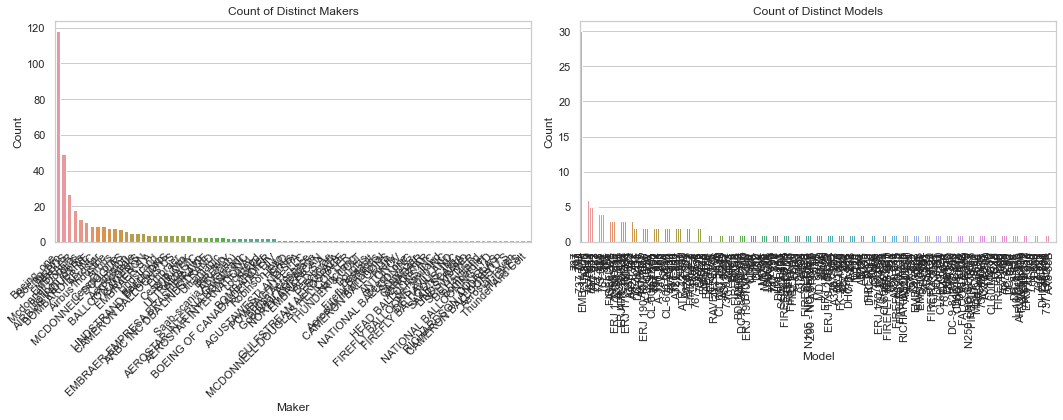

In [630]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create a subplot with two bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for Maker counts
sns.barplot(x=maker_counts.index, y=maker_counts.values, ax=ax1)
ax1.set_title('Count of Distinct Makers')
ax1.set_xlabel('Maker')
ax1.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

# Bar plot for Model counts
sns.barplot(x=model_counts.index, y=model_counts.values, ax=ax2)
ax2.set_title('Count of Distinct Models')
ax2.set_xlabel('Model')
ax2.set_ylabel('Count')

# Rotate x-axis labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, horizontalalignment='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

- We will save this visualization for Tableau.

# Results After Data Analysis and Data Cleaning

- From rar data with 88,889 rows of airctrafts accidents.

# TOP 260 safest airplane models in 2023!


Models: 260
Distinct Makers: 84

# Is 260 enough aircrafts to report options to the CEO of my company??

## YES ! 

- Great options of airplanes with the lowest risk for the company to start this new business endeavor.

- I Google Top 10 Airlines on the United States.

- Let's take a look the results on Forbes!

Overall Rankings: The Best Airlines in the U.S.

1. Delta Air Lines
2. Spirit Airlines
3. SkyWest Airlines
4. United Airlines
5. Alaska Airlines
6. Hawaiian Airlines
7. JetBlue
8. Envoy Air
9. American Airlines
10. Frontier Airlines
11. Southwest Airlines

Forbes 2023 Article link: https://www.forbes.com/sites/laurabegleybloom/2023/04/20/ranked-the-best-airlines-in-2023-according-to-a-new-report/?sh=23c87e9c72c3



- Also, an article from 2023 from CNBC New: The Top results 

1. Delta Air Lines.
2. Hawaiian Airlines.
3. Tradewind Aviation. 
4. JetBlue Airways.
5. Alaska Airlines.
6. Southwest Airlines.
7. United Airlines.
8. American Airlines…


- CNBC News 2023 Article link: https://www.cnbc.com/2023/09/04/delta-southwest-spirit-10-highest-ranking-domestic-airlines.html#:~:text=Delta%20Air%20Lines%20ranked%20as,lowest%20cancellation%20rates%20at%201.96%25.


## Both reliable articles and from 2023 coincide in Delta as top 1

- Now let's Google on Wikipedia information about Delta Airlines and how much aircrafts the Top 1 airline on the United States owns!


## "Fleet overview. Delta's fleet consists of 943 Airbus and Boeing aircraft. As of July 2023, Delta has 501 aircraft from Boeing or about 55 percent of the fleet and 421 aircraft from Airbus or about 45 percent of the fleet."

- So if Delta owns 943 Airbus (501 Boeing and 421 Airbus).

- And my CEO wants to to start this new business endeavor, having 551 options on SAFETY Aircrafts sounds about right!

- Right!?




- For context:

## BOEING
-Boeing: Known for its emphasis on efficiency and performance. Boeing aircraft tend to have a more streamlined and conservative design approach. Airbus: Often focuses on technology and innovation. 

## AIRBUS
-Airbus aircraft incorporate advanced avionics and fly-by-wire systems, allowing for more automation and digital control.

Link 2023 info: https://www.pacificflying.com/boeing-and-airbus-the-major-players-in-the-aviation-industry/#:~:text=Boeing%3A%20Known%20for%20its%20emphasis,more%20automation%20and%20digital%20control.


# I think it will be overwhelming for my CEO to see a list with 260 options...


## How many aircrafts should a new airline start with?


- Delta airline was not the first name of the airline, What was the old name for Delta?

- Old name was on 1925: Huff Daland Dusters.

Link: https://news.delta.com/deltas-history-dusting-crops-connecting-world#:~:text=1925%3A%20Huff%20Daland%20Dusters%2C%20the,owned%20fleet%20in%20the%20world.

# Huff Daland Dusters Airline (1925).

## Delta started with 18th aircrafts...

" The Museum's Huff-Daland Duster is one of eighteen airplanes that were specifically designed by Huff-Daland to perform aerial crop dusting. In addition, the Huff-Daland Duster was the first aircraft to be used by the forerunner of the international airline Delta Air Lines."

Link: https://news.delta.com/deltas-history-dusting-crops-connecting-world#:~:text=1925%3A%20Huff%20Daland%20Dusters%2C%20the,owned%20fleet%20in%20the%20world.



- If my CEO wants to start in the airline business, and if he follows the model of the most successful airline in the country, they started with 18 airplanes.

- So a list with the TOP 260 sounds enough for a good start !

- Finally, I have 6 recomendations.

# 6 Recommendations before buying an airplane! :

- 1. Buy models within the range of my top 260.
- 2. Buy airplanes with a reciprocating engine.
- 3. Don't buy airplanes with a Turbo Prop engine.
- 4. Do not buy airplanes that have had reports of accidents with incidents, injuries or deaths.
- 5. Preferably buy airplanes manufactured after 01/01/1997.
- 6. Don't get carried away by the Maker name, what matters is the Model number.

# THANK YOU !!!

## Data Scientist: Victor Cornejo Leyva

- Linkedin: https://www.linkedin.com/in/victorcornejoo/

- Project presented on December 8 2023, 11 Broadway, New York, New york.

END

In [632]:
df1.to_csv("AviationProject2023VC", index=False)